In [2]:
import cv2
import numpy as np
from importnb import Notebook
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy.matlib

In [3]:
with Notebook(): 
        import utils

check file path


In [7]:
def rotateMatrix(matrix, angle):
    mat_center = tuple(np.array(matrix.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(mat_center, angle, 1.0)
    return cv2.warpAffine(matrix, rot_mat, matrix.shape[1::-1], flags=cv2.INTER_LINEAR)

In [8]:
def blurKernel(r, theta):
    kernel = np.zeros((r,r))
    kernel[r//2,:] = 1/r
    return rotateMatrix(kernel, theta)

In [9]:
def MSELoss(img1, img2):
    return np.sqrt(np.sum(np.power(img1 - img2, 2)))

In [10]:
def linearBlur(img, r, theta):
    kernel = blurKernel(r, theta)
    return cv2.filter2D(img, -1, kernel)

In [18]:
def findKernel(img, r_max, inc_ang):
    mse = float('inf')
    opt_r, opt_theta = 1, 0
    for r in range(1, r_max):
        for theta in range(0, 360, inc_ang):
            blur = linearBlur(img, r, theta)
            err = MSELoss(img, blur)
            print(r, theta, err)
            if err < mse:
                mse = err
                opt_r, opt_theta = r, theta
    return opt_r, opt_theta

In [19]:
def patches(img):
    rows = img.shape[0]
    cols = img.shape[1]
    patch_size = 30
    
    for i in range(0, rows, patch_size):
        ex = min(i + patch_size, rows)
        for j in range(img.shape[1]):
            ey = min(j + patch_size, cols)
            findKernel(img[i:ex, j:ey])
            

image ./resources/test4.jpg loaded


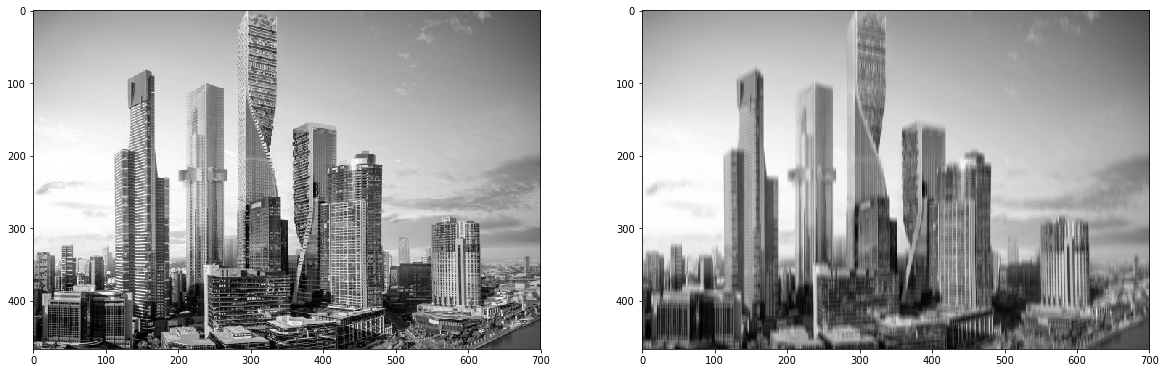

1 0 0.0
1 10 6116.048479206162
1 20 6064.607819142141
1 30 6100.929683253201
1 40 5961.994381077527
1 50 5867.820805034864
1 60 5761.320508355701
1 70 5861.519256984489
1 80 5888.461344018487
1 90 5872.304317727411
1 100 5872.304317727411
1 110 5872.304317727411
1 120 5872.304317727411
1 130 5872.304317727411
1 140 5872.304317727411
1 150 5872.304317727411
1 160 5872.304317727411
1 170 5872.304317727411
1 180 5872.304317727411
1 190 5872.304317727411
1 200 5872.304317727411
1 210 5872.304317727411
1 220 5872.304317727411
1 230 5872.304317727411
1 240 5872.304317727411
1 250 5872.304317727411
1 260 5872.304317727411
1 270 5872.304317727411
1 280 5888.461344018487
1 290 5861.519256984489
1 300 5761.320508355701
1 310 5867.820805034864
1 320 5961.994381077527
1 330 6100.929683253201
1 340 6064.607819142141
1 350 6116.048479206162
2 0 3037.1219929400268
2 10 5825.129268951891
2 20 5900.606917936493
2 30 6151.871991516078
2 40 6031.654002013047
2 50 6033.828883884594
2 60 6099.080750408212


12 110 5369.802230995105
12 120 4213.836850187724
12 130 4363.181637291759
12 140 4385.3673734363465
12 150 4244.857712574121
12 160 5407.689432650511
12 170 5997.351415416642
12 180 5950.369652382951
12 190 5984.421860129849
12 200 5407.645143683154
12 210 4239.211601229644
12 220 4323.263466410531
12 230 4307.098559355242
12 240 4025.4232075646405
12 250 4002.348935312862
12 260 3934.8898332736076
12 270 3801.413158287323
12 280 3927.022408899649
12 290 4009.6745503843576
12 300 4025.3361350327004
12 310 4303.384946759934
12 320 4316.698622790338
12 330 4055.350416425195
12 340 4052.5589446669374
12 350 4010.53300697052
13 0 3950.6641213851626
13 10 4026.92326721034
13 20 4056.8836562070646
13 30 4081.8329216174443
13 40 4119.995995143685
13 50 4229.980496408937
13 60 4082.406275715341
13 70 4681.531159780953
13 80 5817.900394472219
13 90 5943.331473172265
13 100 5972.159827064243
13 110 5835.844326230781
13 120 4556.924950007406
13 130 4138.646638697244
13 140 4260.949307372713
13 1

In [20]:
img = utils.loadImage('./resources/test4.jpg', 'gray')
blurred_img = linearBlur(img, 10, 90)
_, plots = plt.subplots(1,2,figsize=(20,20))
plots[0].imshow(img, cmap = 'gray')
plots[1].imshow(blurred_img, cmap = 'gray')
plt.show()

print(findKernel(img, 15, 10))